In [27]:
# Customer Churn Prediction - Preprocessing and Model Development

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Ensure XGBoost is installed
try:
    from xgboost import XGBClassifier
except ImportError:
    import sys
    !{sys.executable} -m pip install xgboost
    from xgboost import XGBClassifier

In [28]:
# Load the cleansed dataset
df = pd.read_csv('Cleansed_Telco_Customer_Churn.csv')

In [29]:
# Separate features X and target y
X = df.drop('Churn', axis=1)
y = df['Churn'].map({'Yes': 1, 'No': 0})

# Identify numeric and categorical features
types = X.dtypes
numeric_features = types[types.isin([np.int64, np.float64])].index.tolist()
categorical_features = types[types == object].index.tolist()

# Preprocessing pipeline: scaling numeric, encoding categorical
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ]
)

In [30]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [31]:
# Define models and hyperparameter grids
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}
rf_params = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [5, 10],
    'model__min_samples_split': [2, 5]
}
xgb_params = {
    'model__n_estimators': [100, 200],
    'model__learning_rate': [0.01, 0.1],
    'model__max_depth': [3, 5]
}


In [32]:
# Train, tune, and evaluate models
results = {}
for name, estimator in models.items():
    print(f"Training {name}...")
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', estimator)
    ])
    if name == 'Random Forest':
        grid = GridSearchCV(pipeline, rf_params, scoring='roc_auc', cv=5)
        grid.fit(X_train, y_train)
        best = grid.best_estimator_
    elif name == 'XGBoost':
        grid = GridSearchCV(pipeline, xgb_params, scoring='roc_auc', cv=5)
        grid.fit(X_train, y_train)
        best = grid.best_estimator_
    else:
        best = pipeline.fit(X_train, y_train)

    preds = best.predict(X_test)
    probs = best.predict_proba(X_test)[:, 1]
    metrics = {
        'Accuracy': accuracy_score(y_test, preds),
        'Precision': precision_score(y_test, preds),
        'Recall': recall_score(y_test, preds),
        'F1 Score': f1_score(y_test, preds),
        'ROC AUC': roc_auc_score(y_test, probs)
    }
    results[name] = metrics
    print(f"\n{name} Performance:")
    for m, v in metrics.items():
        print(f"  {m}: {v:.4f}")
    print("\nClassification Report:\n", classification_report(y_test, preds))


Training Logistic Regression...

Logistic Regression Performance:
  Accuracy: 0.8112
  Precision: 0.6858
  Recall: 0.5627
  F1 Score: 0.6182
  ROC AUC: 0.8568

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1539
           1       0.69      0.56      0.62       574

    accuracy                           0.81      2113
   macro avg       0.77      0.73      0.75      2113
weighted avg       0.80      0.81      0.80      2113

Training Random Forest...

Random Forest Performance:
  Accuracy: 0.7922
  Precision: 0.7213
  Recall: 0.3833
  F1 Score: 0.5006
  ROC AUC: 0.8523

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.94      0.87      1539
           1       0.72      0.38      0.50       574

    accuracy                           0.79      2113
   macro avg       0.76      0.66      0.68      2113
weighted avg       0.78      0.79      0.77  

C:\Users\User\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:52:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\User\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:52:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\User\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:52:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\User\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:52:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain,


XGBoost Performance:
  Accuracy: 0.8060
  Precision: 0.6855
  Recall: 0.5279
  F1 Score: 0.5965
  ROC AUC: 0.8573

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1539
           1       0.69      0.53      0.60       574

    accuracy                           0.81      2113
   macro avg       0.76      0.72      0.73      2113
weighted avg       0.80      0.81      0.80      2113



C:\Users\User\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:52:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [33]:
# Summarize results
print("\n=== Model Performance Summary ===")
summary_df = pd.DataFrame(results).T
print(summary_df)

# Identify the best model based on ROC AUC
best_model = summary_df['ROC AUC'].idxmax()
best_metrics = summary_df.loc[best_model]
print(f"\nBest Model: {best_model}")
print("Metrics of Best Model:")
print(best_metrics)



=== Model Performance Summary ===
                     Accuracy  Precision    Recall  F1 Score   ROC AUC
Logistic Regression  0.811169   0.685775  0.562718  0.618182  0.856801
Random Forest        0.792239   0.721311  0.383275  0.500569  0.852303
XGBoost              0.805963   0.685520  0.527875  0.596457  0.857326

Best Model: XGBoost
Metrics of Best Model:
Accuracy     0.805963
Precision    0.685520
Recall       0.527875
F1 Score     0.596457
ROC AUC      0.857326
Name: XGBoost, dtype: float64


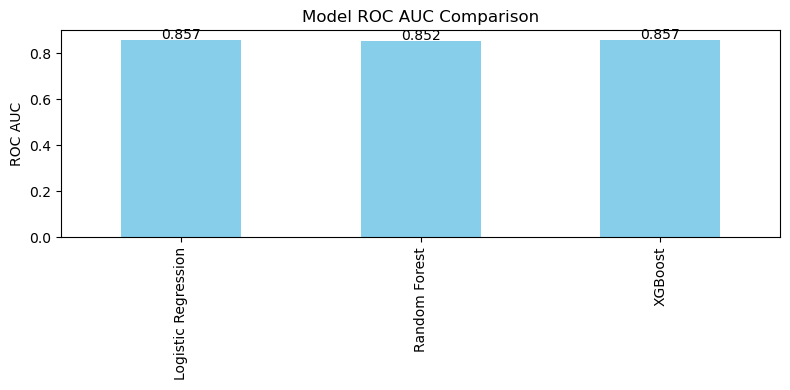

Completed preprocessing, model training, evaluation, and selection.


In [34]:
# Visual comparison of ROC AUC
plt.figure(figsize=(8, 4))
summary_df['ROC AUC'].plot(kind='bar', color='skyblue')
plt.ylabel('ROC AUC')
plt.title('Model ROC AUC Comparison')
for idx, val in enumerate(summary_df['ROC AUC']):
    plt.text(idx, val + 0.005, f"{val:.3f}", ha='center')
plt.tight_layout()
plt.show()

print("Completed preprocessing, model training, evaluation, and selection.")
